In [22]:
# import add-ons
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import numpy as np #imports
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
from scipy import stats
import netCDF4
import cmocean
from dateutil import parser

In [23]:
# Store Filepaths
dabob_fp = 'data/ORCA_Dabobbay-H1_Oxygen.csv'
hansville_fp = 'data/ORCA_Hansville-H1_Oxygen.csv'
hoodsport_fp = 'data/ORCA_Hoodsport-H1_Oxygen.csv'
twanoh_fp = 'data/ORCA_Twanoh-H1_Oxygen.csv'

In [24]:
# Open and Read Data
dabob_df = pd.read_csv(dabob_fp,header = 0)
hansville_df = pd.read_csv(hansville_fp,header = 0)
hoodsport_df = pd.read_csv(hoodsport_fp,header = 0)
twanoh_df = pd.read_csv(twanoh_fp,header = 0)

# Convert Units to String
dabob_df[' Depth (Ft)'].astype(str)  
# Create List for unitless depths
dabob_df_d = []
# Remove units and add to list
for x in dabob_df[' Depth (Ft)']:
    dabob_df_new = x.split(' ')
    dabob_df_d.append(dabob_df_new[1])
dabob_df['Depth'] = dabob_df_d    

    # Convert Units to String
hansville_df[' Depth (Ft)'].astype(str)  
# Create List for unitless depths
hansville_df_d = []
# Remove units and add to list
for x in hansville_df[' Depth (Ft)']:
    hansville_df_new = x.split(' ')
    hansville_df_d.append(hansville_df_new[1])
hansville_df['Depth'] = hansville_df_d 

    # Convert Units to String
hoodsport_df[' Depth (Ft)'].astype(str)  
# Create List for unitless depths
hoodsport_df_d = []
# Remove units and add to list
for x in hoodsport_df[' Depth (Ft)']:
    hoodsport_df_new = x.split(' ')
    hoodsport_df_d.append(hoodsport_df_new[1])
hoodsport_df['Depth'] = hoodsport_df_d 

    # Convert Units to String
twanoh_df[' Depth (Ft)'].astype(str)  
# Create List for unitless depths
twanoh_df_d = []
# Remove units and add to list
for x in twanoh_df[' Depth (Ft)']:
    twanoh_df_new = x.split(' ')
    twanoh_df_d.append(twanoh_df_new[1])
twanoh_df['Depth'] = twanoh_df_d 
    
# Clean DF
# Find Indeces for Oct 13, 2023
dabob_inds = np.where(dabob_df['Date and Time']=='2023-10-13T12:17:00-0700')
hansville_inds = np.where(hansville_df['Date and Time']=='2023-10-13T12:20:16-0700')
hoodsport_inds = np.where(hoodsport_df['Date and Time']=='2023-10-13T12:19:59-0700')
twanoh_inds = np.where(twanoh_df['Date and Time']=='2023-10-13T12:08:54-0700')

# Create Data Frames for Oct 13, 2023
dabob10_13 = dabob_df.loc[dabob_inds]
hansville10_13 = hansville_df.loc[hansville_inds]
hoodsport10_13 = hoodsport_df.loc[hoodsport_inds]
twanoh10_13 = twanoh_df.loc[twanoh_inds]

In [25]:
# Cleaning Dabob Bay Data
# Convert Units to String
dabob10_13[' Depth (Ft)'].astype(str)  
# Create List for unitless depths
dabob_d = []
# Remove units and add to list
for x in dabob10_13[' Depth (Ft)']:
    dabob_new = x.split(' ')
    dabob_d.append(dabob_new[1])
# Add to Dataframe
dabob10_13['Depth'] = dabob_d
# convert to integer
dabob10_13['Depth'] = dabob10_13['Depth'].astype(int)
# Sort Values by Depth
dabob10_13 = dabob10_13.sort_values('Depth',ascending = False)

In [26]:
# Cleaning Hansville Data
# Convert Units to String
hansville10_13[' Depth (Ft)'].astype(str)  
# Create List for unitless depths
hansville_d = []
# Remove units and add to list
for x in hansville10_13[' Depth (Ft)']:
    hansville_new = x.split(' ')
    hansville_d.append(hansville_new[1])
# Add to Dataframe
hansville10_13['Depth'] = hansville_d
# convert to integer
hansville10_13['Depth'] = hansville10_13['Depth'].astype(int)
# Sort Values by Depth
hansville10_13 = hansville10_13.sort_values('Depth',ascending = False)

In [27]:
# Cleaning hoodsport Data
# Convert Units to String
hoodsport10_13[' Depth (Ft)'].astype(str)  
# Create List for unitless depths
hoodsport_d = []
# Remove units and add to list
for x in hoodsport10_13[' Depth (Ft)']:
    hoodsport_new = x.split(' ')
    hoodsport_d.append(hoodsport_new[1])
# Add to Dataframe
hoodsport10_13['Depth'] = hoodsport_d
# convert to integer
hoodsport10_13['Depth'] = hoodsport10_13['Depth'].astype(int)
# Sort Values by Depth
hoodsport10_13 = hoodsport10_13.sort_values('Depth',ascending = False)

In [28]:
# Cleaning Twanoh Bay Data
# Convert Units to String
twanoh10_13[' Depth (Ft)'].astype(str)  
# Create List for unitless depths
twanoh_d = []
# Remove units and add to list
for x in twanoh10_13[' Depth (Ft)']:
    twanoh_new = x.split(' ')
    twanoh_d.append(twanoh_new[1])
# Add to Dataframe
twanoh10_13['Depth'] = twanoh_d
# convert to integer
twanoh10_13['Depth'] = twanoh10_13['Depth'].astype(int)
# Sort Values by Depth
twanoh10_13 = twanoh10_13.sort_values('Depth',ascending = False)
#display(twanoh10_13)

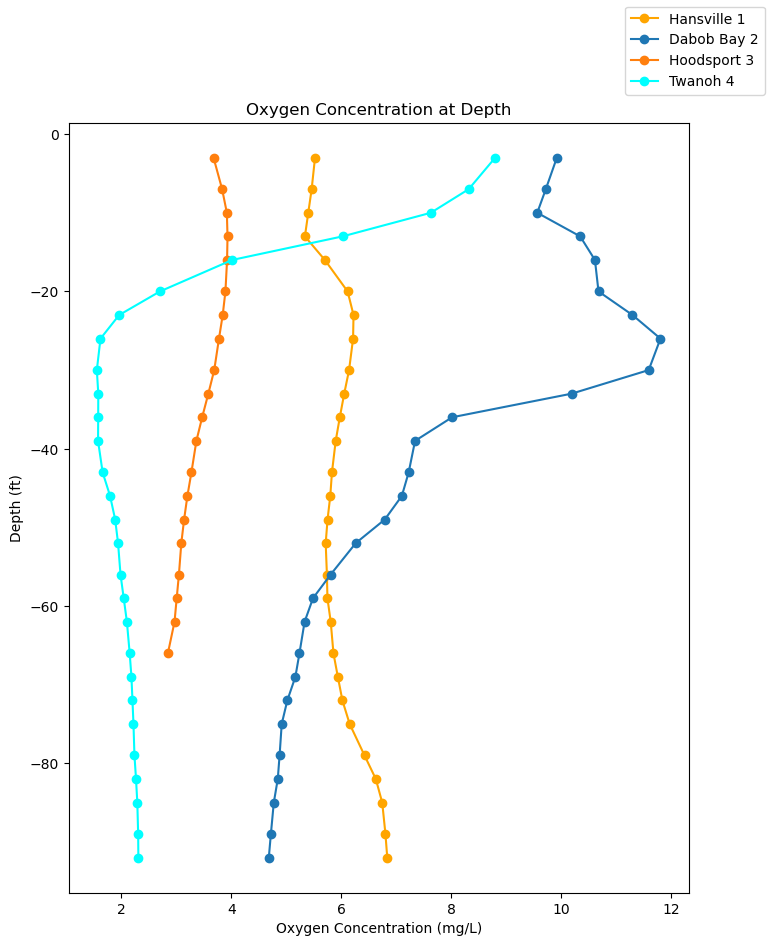

In [29]:
# Oxygen Depth Profiles
# Create Plot
fig,axs = plt.subplots(figsize = (8,10))
# Plot Data
axs.plot(hansville10_13[' Oxygen Conc. (mg/L)'],hansville10_13['Depth'],label = 'Hansville 1',color = 'orange',marker = 'o')
axs.plot(dabob10_13[' Oxygen Conc. (mg/L)'],dabob10_13['Depth'],label = 'Dabob Bay 2',marker = 'o')
axs.plot(hoodsport10_13[' Oxygen Conc. (mg/L)'],hoodsport10_13['Depth'],label = 'Hoodsport 3',marker = 'o')
axs.plot(twanoh10_13[' Oxygen Conc. (mg/L)'],twanoh10_13['Depth'],label = 'Twanoh 4',color = 'Cyan',marker = 'o')
# Adds Axis and Figure Titles
axs.set_xlabel('Oxygen Concentration (mg/L)')
axs.set_ylabel('Depth (ft)')
axs.set_title('Oxygen Concentration at Depth')
# Add Other Required Features
fig.legend()
plt.show()

,Date and Time,Depth (Ft),Oxygen Conc. (mg/L),Depth,Datetime
0,2023-09-01T12:16:48-0700,-33 ft,8.3012,-33,2023.0901
1,2023-09-01T12:16:48-0700,-36 ft,8.1357,-36,2023.0901
2,2023-09-01T12:16:48-0700,-39 ft,7.6570,-39,2023.0901
3,2023-09-01T12:16:48-0700,-43 ft,7.1947,-43,2023.0901
4,2023-09-01T12:16:48-0700,-46 ft,6.8972,-46,2023.0901
...,...,...,...,...,...
2179,2023-11-17T12:16:34-0800,-16 ft,10.6149,-16,2023.1117
2180,2023-11-17T12:16:34-0800,-20 ft,10.6800,-20,2023.1117
2181,2023-11-17T12:16:34-0800,-23 ft,11.2982,-23,2023.1117
2182,2023-11-17T12:16:34-0800,-26 ft,11.8072,-26,2023.1117


Depth,-10,-13,-16,-20,-23,-26,-3,-30,-33,-36,...,-66,-69,-7,-72,-75,-79,-82,-85,-89,-92
Date and Time,,,,,,,,,,,,,,,,,,,,,
2023-09-01T12:16:48-0700,10.3379,10.4786,10.1434,9.4691,8.8724,8.8389,10.4673,8.6818,8.3012,8.1357,...,5.9673,5.9367,10.4026,5.8984,5.8087,5.6339,5.4581,5.3245,5.2166,5.1216
2023-09-02T12:16:54-0700,10.2461,10.3778,10.5321,10.5012,10.1746,9.8304,10.0883,9.3038,8.6323,8.3675,...,5.8928,5.7572,10.1672,5.6889,5.5748,5.4244,5.3091,5.2013,5.1298,5.0397
2023-09-03T12:17:17-0700,10.0437,10.1012,10.3505,10.4769,10.4168,10.3353,9.9747,10.0126,9.4711,9.1262,...,5.6933,5.6109,10.0092,5.5876,5.5350,5.4417,5.3615,5.2772,5.1806,5.1062
2023-09-04T12:17:20-0700,8.3712,8.5035,8.8843,9.7205,10.2866,10.4087,8.5801,9.8711,9.0696,8.4701,...,6.0033,5.9041,8.4751,5.7428,5.4671,5.1908,4.9926,4.8532,4.7858,4.7118
2023-09-05T12:16:54-0700,10.2252,10.3125,10.2415,10.0655,9.5943,8.8287,10.0431,7.7849,7.4656,7.6710,...,5.7968,5.5916,10.1341,5.3952,5.2418,5.1433,5.0580,4.9079,4.8041,4.7438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-13T12:17:11-0800,9.5655,10.3465,10.6149,10.6800,11.2982,11.8072,9.9219,11.5929,10.1898,8.0166,...,5.2396,5.1655,9.7210,5.0189,4.9168,4.8782,4.8451,4.7727,4.7196,4.6818
2023-11-14T12:16:36-0800,9.5655,10.3465,10.6149,10.6800,11.2982,11.8072,9.9219,11.5929,10.1898,8.0166,...,5.2396,5.1655,9.7210,5.0189,4.9168,4.8782,4.8451,4.7727,4.7196,4.6818
2023-11-15T12:17:26-0800,9.5655,10.3465,10.6149,10.6800,11.2982,11.8072,9.9219,11.5929,10.1898,8.0166,...,5.2396,5.1655,9.7210,5.0189,4.9168,4.8782,4.8451,4.7727,4.7196,4.6818


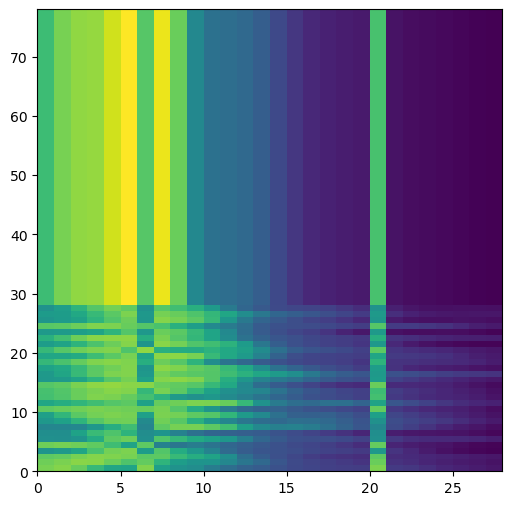

In [31]:

# Dissolved Oxygen Over Time and Depth


# Convert Datetime strings to Datetimes
datetimes = []
for date in dabob_df['Date and Time']:
    datetimes.append(parser.parse(date))
# Subsets Datetimes to Dataframe
dabob_df['Datetime'] = datetimes
dabob_df['Datetime'] = dabob_df['Datetime'].astype(str)

#Create Daily Datetime Integers
dabob_dateint = []
for x in dabob_df['Datetime']:
    dabob_datedec = x.split('-')
    dabob_dateint.append(int(dabob_datedec[0])+(int(dabob_datedec[1])/100)+(int(dabob_datedec[2][:2])/10000))
dabob_df['Datetime'] = dabob_dateint

#dabob_ar = np.array([0,0,0])

piv = pd.pivot_table(dabob_df, index='Date and Time', columns='Depth', values=' Oxygen Conc. (mg/L)')
display(dabob_df)
display(piv)

# Create 2d Array
#for x in range(len(dabob_df)):
    #ar_temp = np.array([dabob_df['Datetime'][x],dabob_df['Depth'][x],dabob_df[' Oxygen Conc. (mg/L)'][x]])
    #dabob_ar = np.vstack((dabob_ar,ar_temp))
#dabob_ar = np.delete(dabob_ar, (0), axis=0)
#dabob_ar = np.delete(dabob_ar, (1), axis=0)

#Plot 
fig,axs = plt.subplots(figsize = (6,6))
axs.pcolormesh(piv)